## Table of Contents

1. [Import Libraries](#import-libraries)
2. [Load Customer Dataset](#load-customer-dataset)
3. [Inspect Customer Data Structure](#inspect-customer-data-structure)
4. [Clean and Rename Customer Columns](#clean-and-rename-customer-columns)
5. [Validate Customer Data Quality](#validate-customer-data-quality)
6. [Load Prepared Orders Dataset](#load-prepared-orders-dataset)
7. [Merge Customer and Orders Data](#merge-customer-and-orders-data)
8. [Validate Merged Dataset](#validate-merged-dataset)
9. [Export Final Merged Dataset](#export-final-merged-dataset)
10. [Load Final Dataset for Analysis](#load-final-dataset-for-analysis)
11. [Explore Dataset Structure](#explore-dataset-structure)
12. [Visualize Order Frequency by Hour](#visualize-order-frequency-by-hour)
13. [Visualize Customer Loyalty Distribution](#visualize-customer-loyalty-distribution)
14. [Create Training and Testing Subsets](#create-training-and-testing-subsets)
15. [Analyze Prices by Order Hour](#analyze-prices-by-order-hour)
16. [Analyze Age vs Number of Dependents](#analyze-age-vs-number-of-dependents)
17. [Analyze Age vs Income](#analyze-age-vs-income)
18. [Export Visualizations](#export-visualizations)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data
df = pd.read_pickle(r'C:\Users\rbaue\Desktop\Instacart\Prepared Data\ords_prods_cust2_merge.pkl')

In [3]:
df.shape

(32404859, 32)

In [4]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,spender_flag,med_dspo,order_regularity,gender,state,age,date_joined,number_of_dependants,marital_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Low_spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Low_spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Low_spender,8.0,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Low_spender,9.0,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Low_spender,9.0,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308


In [5]:
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'busiest_day', 'busiest_days', 'most_orders',
       'busiest_hours', 'max_order', 'loyalty_flag', 'avg_price',
       'average_spend', 'spender_flag', 'med_dspo', 'order_regularity',
       'gender', 'state', 'age', 'date_joined', 'number_of_dependants',
       'marital_status', 'income'],
      dtype='object')

In [6]:
# 3.

<Axes: ylabel='Frequency'>

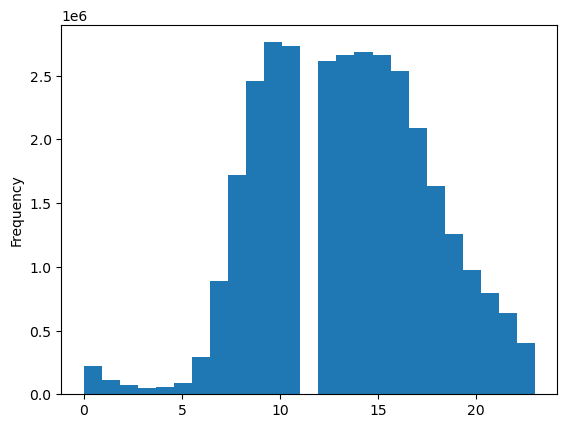

In [7]:
df['order_hour_of_day'].plot.hist(bins = 25)

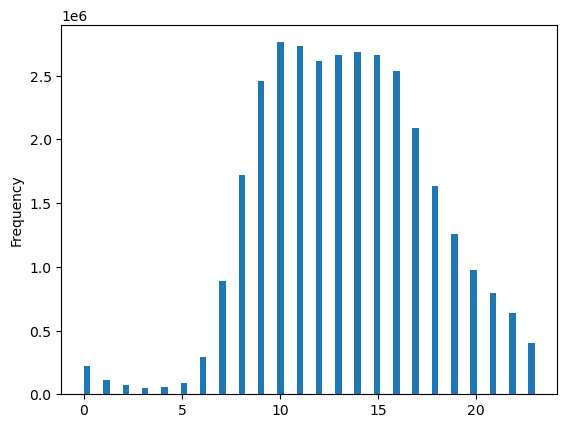

In [8]:
hist = df['order_hour_of_day'].plot.hist(bins = 70)

The histogram demonstrates the frequency of orders that happen at each hour of the day. The hours of the day are on the x=axis. 10 is 10:00am, 15 is 3:00pm, and so on. For example, the frequency of orders at 10am is about 3.0

In [9]:
# 4.

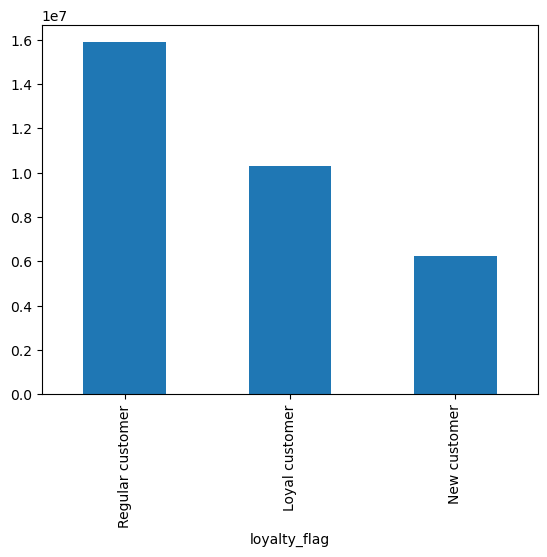

In [10]:
bar = df['loyalty_flag'].value_counts().plot.bar()

In [11]:
# 5.

In [12]:
# Create a list holding True/False values to the test np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [13]:
# Store 70% of the sample in the dataframe big
big = df[dev]
# Store 30% of the sample in the dataframe small
small = df[~dev]

In [14]:
len(df)

32404859

In [15]:
len(big) + len(small)

32404859

In [16]:
## Create a new dataframe that contains only the order_hour_day and prices columns from the small subset 
df_2 = small[['order_hour_of_day', 'prices']]

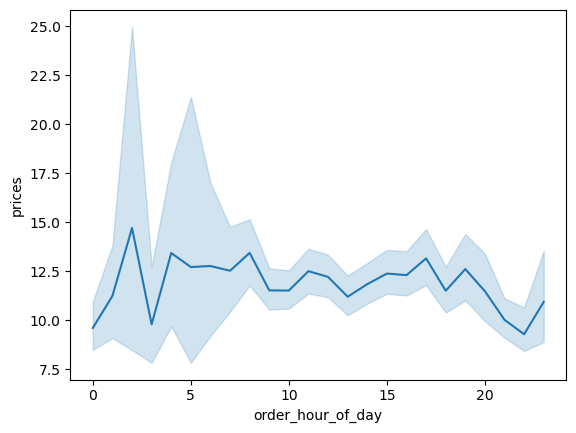

In [17]:
line = sns.lineplot(data = df_2, x = 'order_hour_of_day', y = 'prices')

In [18]:
# 6.

In [19]:
## Create a new dataframe that contains only the age and number of dependants columns from the small subset 
df_3 = small[['age', 'number_of_dependants']]

In [20]:
df_3.head()

,age,number_of_dependants
0,81,1
2,66,2
3,40,3
6,20,3
10,61,1


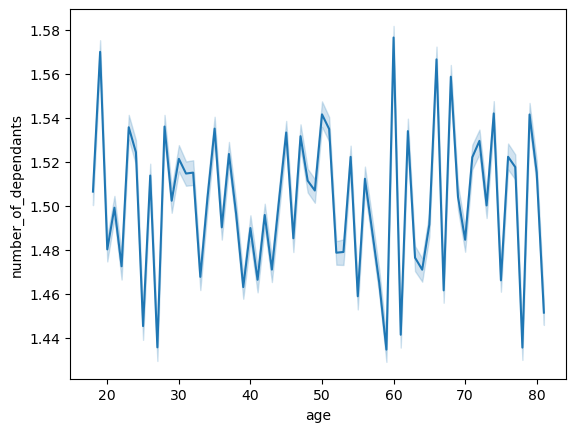

In [21]:
line2 = sns.lineplot(data = df_3, x = 'age', y = 'number_of_dependants')

This line chart shows the number of dependants that customers of various ages have

In [22]:
# 7.

In [23]:
## Create a new dataframe that contains only the age and income columns from the small subset 
df_4 = small[['age', 'income']]

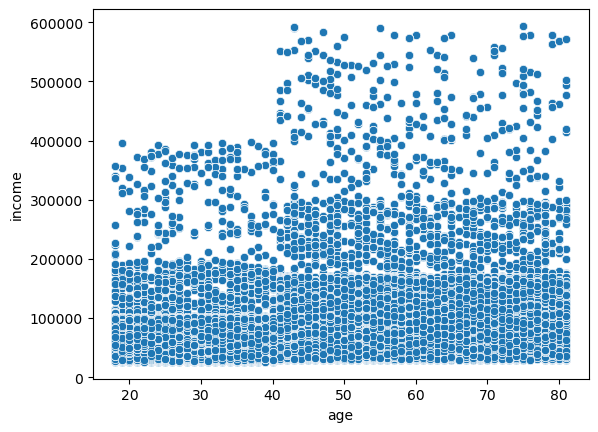

In [24]:
scatter = sns.scatterplot(x = 'age', y = 'income', data = df_4)

This scatterplot shows the different income amounts that customers of each age have

In [25]:
# 8.

In [26]:
## Export all visualiations

In [27]:
path = r'C:\Users\rbaue\Desktop\Instacart'

In [28]:
hist.figure.savefig(os.path.join(path, 'Visualizations', 'hist_order_hour_of_day.png'))

In [29]:
bar.figure.savefig(os.path.join(path, 'Visualizations', 'bar_loyalty_flag.png'))

In [30]:
line.figure.savefig(os.path.join(path, 'Visualizations', 'line_order_hour_of_day_prices.png'))

In [31]:
line2.figure.savefig(os.path.join(path, 'Visualizations', 'line2_age_number_of_dependants.png'))

In [32]:
scatter.figure.savefig(os.path.join(path, 'Visualizations', 'scatter_age_income.png'))